# Word2Vec

In [130]:
import pandas as pd
import numpy as np
import gensim
import time
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from datetime import datetime
from sklearn.manifold import TSNE

In [131]:
twitter_df = pd.read_csv('../Data/twitter_target.csv')
power_df = pd.read_csv('../Data/power_outage.csv')

In [132]:
twitter_df = twitter_df.drop(columns=['time_location', 'date_state'])
twitter_df = twitter_df[twitter_df['target'] == 1]
twitter_df.head()

,tweet,location,time_stamp,target
2214,my ideal boy would lay eat and watch movies wi...,Georgia,2015-01-08 03:22:00,1
2423,whos ready for a power outage at goetz,Georgia,2014-02-21 19:56:38,1
2424,last minute pl blackout shud be fun,Georgia,2014-02-21 19:52:26,1
2425,michaelcisero c monnn blackout cis,Georgia,2014-02-21 17:20:13,1
2426,we are one week away from the blackout party a...,Georgia,2014-02-21 13:29:18,1


In [133]:
power_df.head()

,Unnamed: 0,Month,Date Event Began,Time Event Began,Date of Restoration,Time of Restoration,Area Affected,NERC Region,Alert Criteria,Event Type,Demand Loss (MW),Number of Customers Affected,state,Hour Event Began,time_location
0,0,January,2014-01-06,19:50:00,01/06/2014,20:44:00,District of Columbia,RFC,Missing,Voltage Reduction due to Severe Weather - Cold,Unknown,Unknown,District of Columbia,19,2014-01-06 19:00:00 | District of Columbia
1,1,January,2014-01-06,19:50:00,01/06/2014,20:44:00,Unknown,RFC,Missing,Voltage Reduction due to Severe Weather - Cold,Unknown,Unknown,Unknown,19,2014-01-06 19:00:00 | Unknown
2,2,January,2014-01-06,19:52:00,01/06/2014,20:45:00,Delaware,RFC,Missing,Voltage Reduction due to Severe Weather - Cold,Unknown,Unknown,Delaware,19,2014-01-06 19:00:00 | Delaware
3,3,January,2014-01-06,20:45:00,01/07/2014,21:00:00,Unknown,RFC,Missing,Public Appeal due to Severe Weather - Cold,Unknown,Unknown,Unknown,20,2014-01-06 20:00:00 | Unknown
4,4,January,2014-01-06,19:50:00,01/06/2014,20:49:00,Pennsylvania,RFC,Missing,Voltage Reduction due to Severe Weather - Cold,200,62000,Pennsylvania,19,2014-01-06 19:00:00 | Pennsylvania


___
test model from lecture 7.06

In [134]:
# Start timer.
t0 = time.time()

# Import word vectors into "model."
model = gensim.models.KeyedVectors.load_word2vec_format('/Users/Creighton/Downloads/lexvec.enwiki+newscrawl.300d.W.pos.vectors')

# Print results of timer.
print(time.time() - t0)

224.34162592887878


In [135]:
model.vector_size

300

In [136]:
twitter_df.shape

(942, 4)

In [137]:
# total number of words in all of our tweets
twitter_df['tweet'].apply(lambda x: len(x.split(' '))).sum()

14110

In [138]:
# let's make a large list of all of the tweet for our Word2Vec
tweets = [tweet for tweet in twitter_df['tweet']]

all_tweets = ' '.join(tweets)

len(all_tweets)

78598

In [139]:
# remove any stop words
stop_words = set(stopwords.words('english'))

tweet_word_list = [word for word in all_tweets.split() if not word in stop_words]

len(tweet_word_list)

8563

In [140]:
model['blackout'][:10]

array([ 0.262504,  0.008696, -0.213515,  0.144787, -0.221665,  0.004943,
        0.072322,  0.183042, -0.080359, -0.277223], dtype=float32)

In [141]:
# I want a list of every twitter word that is also in the model's vocab
words_in_model = [word for word in tweet_word_list if word in model.vocab]
len(words_in_model)

7506

In [142]:
# now let's get a list of the vectors for each of those words
word_vec = [model[word] for word in tweet_word_list if word in model.vocab]
len(word_vec)

7506

In [143]:
# now let's make a dataframe for our twitter words that exist in the model and their corresponding vectors
w2vdf = pd.DataFrame.from_dict(dict(zip(words_in_model, word_vec))).T
w2vdf.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
ideal,0.000401,-0.051963,0.187993,0.023795,0.047599,0.116837,-0.207577,-0.077394,-0.092668,0.114485,...,-0.206998,-0.044456,0.124399,-0.140104,-0.067430,0.184294,-0.100378,-0.328836,-0.096210,-0.077211
boy,0.012195,-0.158559,-0.092511,0.126085,-0.038069,-0.065197,0.229634,0.147388,-0.283523,0.005988,...,0.025272,-0.086496,0.085538,0.001216,-0.190441,-0.094042,0.107214,0.201927,-0.046428,-0.079125
would,0.008565,-0.058990,0.051597,0.109166,-0.082840,0.032512,0.070045,-0.242439,0.085045,0.023594,...,0.079836,0.170589,0.012798,-0.027888,0.008185,0.046381,-0.034331,-0.048365,-0.019907,-0.049544
lay,0.036452,-0.145980,0.097011,0.082613,-0.274384,-0.100621,0.100144,0.034582,0.101097,-0.115450,...,0.195271,0.130571,-0.195179,-0.315485,-0.047350,0.068893,-0.243932,0.018725,0.132588,-0.005890
eat,0.133293,-0.122994,0.127027,-0.022316,-0.221209,-0.109066,0.053891,-0.308181,0.074119,-0.085832,...,0.104774,0.051666,0.086189,-0.089596,-0.260465,0.348694,-0.169702,-0.063244,0.317690,-0.033620


In [144]:
w2vdf.shape

(2318, 300)

___
## t-SNE: reducing dimentionality

In [195]:
keywords = ['blackout', 'electricity', 'power', 'outage', 'shortage', 'failure', 'storm', 'electric', 'fire',
            'wind', 'powerout']
index_list = []
for i, word in enumerate(w2vdf.index):
    if word in keywords:
        index_list.append(i)
index_list

[8, 12, 13, 190, 802, 1325, 1790, 2000]

In [196]:
t0 = time.time()

# Initialize t-SNE
tsne = TSNE(random_state = 42, perplexity = 175)

tsne_df = tsne.fit_transform(w2vdf)

print(time.time() - t0)

74.96522498130798


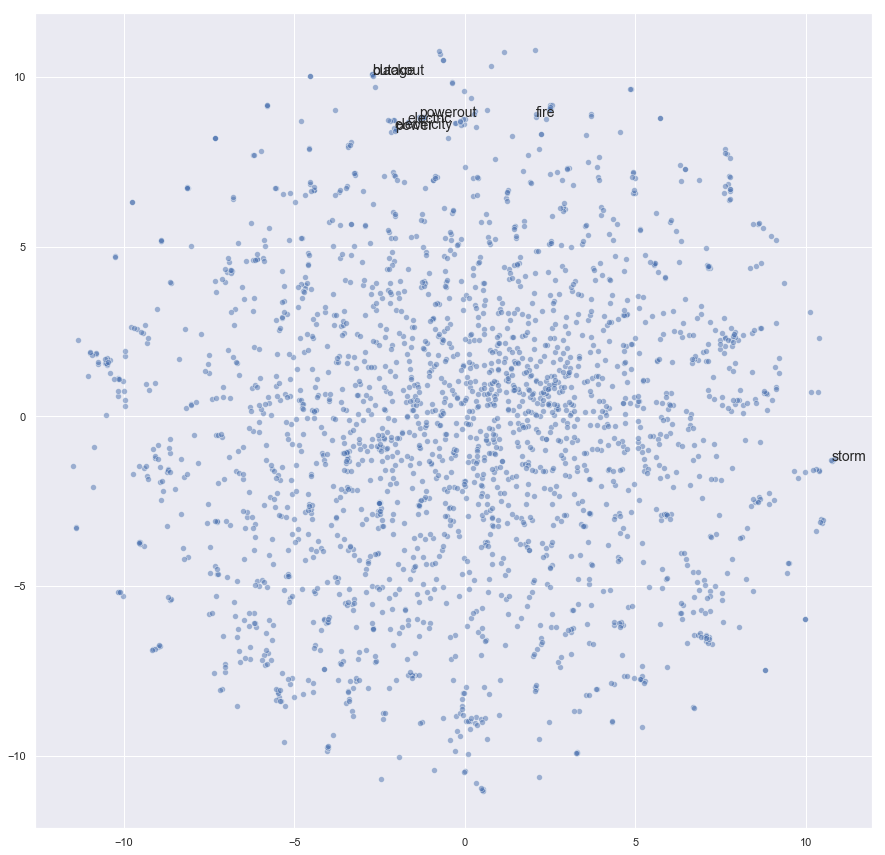

<Figure size 432x288 with 0 Axes>

In [199]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (15, 15))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# initialize list of texts
texts = []
words_to_plot = index_list

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], w2vdf.index[word], fontsize = 14))
    
plt.show()
plt.tight_layout()

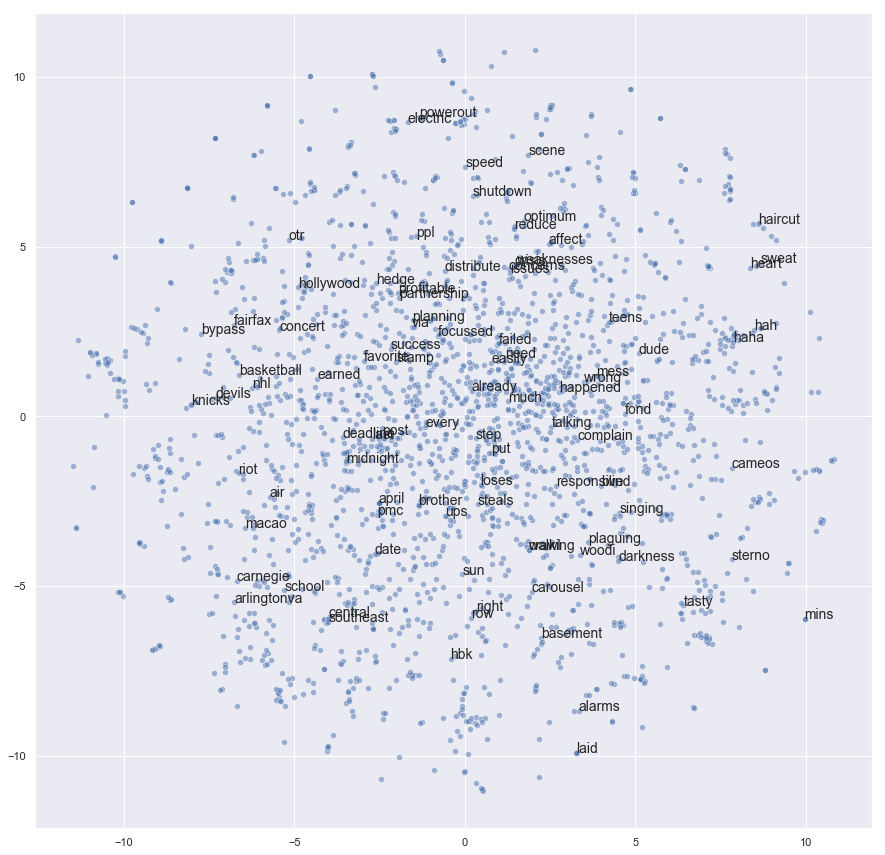

In [200]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (15, 15))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# initialize list of texts
texts = []
words_to_plot = list(np.arange(15, 2318, 25))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], w2vdf.index[word], fontsize = 14))
    
#plt.show()